# Language model PTB benchmark

Here we will train the stream predictor on PTB train set and test it on the PTB test set.
In test phase we will measure the perplexity on the test data.

In [ ]:
%pylab inline
%load_ext autoreload
%autoreload 2

In [16]:
import sys
import logging
import random
from streampredictor.stream_predictor import StreamPredictor
sys.path.insert(0,'../')
sys.path.insert(0,'../streampredictor/')

## Setting the parameters
Setting the training/test file to the standard PTB dataaset. 

In [5]:
train_file = '../Data/ptb.train.txt'
test_file = '../Data/ptb.test.txt'
output_filename = '../PatternStore/ptb_benchmark.tsv'
logging.basicConfig(filename='../PatternStore/perplexity.log', level=logging.INFO)

Load all the words from the train/test files

In [21]:
def get_words_from_file(filename):
    with open(filename, 'r') as f:
        words = f.read().replace('\n', '').replace('  ', ' ').split(' ')
        print('There are ', len(words), ' words in the file ', filename)
        return words

train_words = get_words_from_file(train_file)
test_words = get_words_from_file(test_file)
print('Few train words are :', ' '.join(train_words[100:120]))
print(' ')
print('Few test words are :', ' '.join(test_words[100:120]))

There are  887523  words in the file  ../Data/ptb.train.txt
There are  78671  words in the file  ../Data/ptb.test.txt
Few train words are : it more than N years ago researchers reported the asbestos fiber <unk> is unusually <unk> once it enters the <unk>
 
Few test words are : selling pressure big investment banks refused to step up to the plate to support the beleaguered floor traders by buying


## Training
Initialize a stream predictor object call sp.
Train it on the training words. 
Once training is done, save the patterns to a file.

In [17]:
sp = StreamPredictor()
sp.train(train_words)
sp.file_manager.save_tsv('%s' % output_filename)


============= Stream Predictor Hyper parameters ===================
The perplexity count constant is 6000
The occasional step periods is 2000
Feed strength gain is 1000000
============= End Stream Predictor Hyper parameters ===================
Started training with 887523 words
Adding 887523 words to vocabulary
now there are  10000  words in vocabulary.
Occasional step at  10000
Fixing incorrect first_child_parents
Occasional step at  20000
Fixing incorrect first_child_parents
Occasional step at  30000
Fixing incorrect first_child_parents
Occasional step at  40000
Fixing incorrect first_child_parents
Occasional step at  50000
Fixing incorrect first_child_parents
Occasional step at  60000
Fixing incorrect first_child_parents
Finished training in 60003 steps
The rate of learning is 0.062 K words/s
Saved file ../PatternStore/ptb_benchmark.tsv with pattern count 51159


## Testing
Now let us calculate the perplexity on the test set.

Adding 2000 words to vocabulary
now there are  11159  words in vocabulary.
Started calculating perplexity with word count = 2000
 Final perplexity is  6370.92892443  final vocab count is  11159


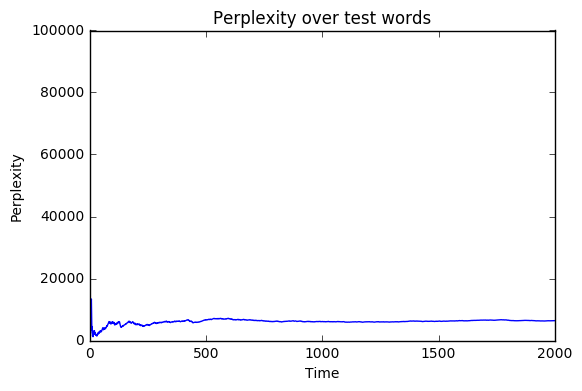

In [22]:
perplexity_list = sp.calculate_perplexity(words=test_words)
plt.plot(perplexity_list)
plt.xlabel('Time')
plt.ylabel('Perplexity')
plt.title('Perplexity over test words')
plt.show()

## Checking out the generator
Now that the word predictor is trained, 
Let us compare perplexity of a valid sentence with a jumpled one.
We will see that the first one (valid) has lower perplexity as expected.

In [27]:
sp.calculate_perplexity(['he', 'has', 'other','feelings'])

Adding 4 words to vocabulary
now there are  11159  words in vocabulary.
Started calculating perplexity with word count = 4
 Final perplexity is  1244.46665863  final vocab count is  11159


[277.22160056951151, 5265.1837628853045, 13385.800688020156]

In [28]:
sp.calculate_perplexity(['he', 'other', 'feelings','has'])

Adding 4 words to vocabulary
now there are  11159  words in vocabulary.
Started calculating perplexity with word count = 4
 Final perplexity is  4730.1481069  final vocab count is  11159


[57861.936082215769, 70753.752572298647, 79402.282286401532]